In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [3]:
df.head()

,Unnamed: 0,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0,0.000000,4.117884,9.999992e-07,-0.807395,-0.676189,8.753529e+00,0.5,1.0,2.0,3.0,0.0,0.0
1,1,0.040003,4.109888,9.999992e-07,-4.661741,-0.074841,9.999995e-07,0.5,2.0,2.0,4.0,1.0,0.0
2,2,0.000000,4.124657,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,4.0,3.0,2.0,0.0
3,3,0.000000,4.133164,5.841922e-01,-2.870421,-0.835088,9.013717e+00,1.0,0.0,4.0,1.0,1.0,0.0
4,4,0.000000,4.124021,5.841922e-01,-1.394857,-0.895270,9.999995e-07,0.5,2.0,5.0,1.0,2.0,0.0


In [4]:
df = df.iloc[:,1:]

In [5]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [6]:
X = df.drop(['Label-0/1'], axis = 1)
y = df['Label-0/1']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [8]:
X_train.shape

(662608, 11)

In [9]:
model=keras.models.Sequential([
    layers.Dense(units=300,activation='relu',input_shape=[11]),
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=29,activation ='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               3600      
                                                                 
 dense_1 (Dense)             (None, 512)               154112    
                                                                 
 dense_2 (Dense)             (None, 29)                14877     
                                                                 
Total params: 172,589
Trainable params: 172,589
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer="sgd",
             metrics=['accuracy'])

In [12]:
model_history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=30)

Epoch 1/30
663/663 [==============================] - 7s 7ms/step - loss: 0.7051 - accuracy: 0.5736 - val_loss: 0.6669 - val_accuracy: 0.5938
Epoch 2/30
663/663 [==============================] - 5s 7ms/step - loss: 0.6624 - accuracy: 0.5989 - val_loss: 0.6614 - val_accuracy: 0.6016
Epoch 3/30
663/663 [==============================] - 4s 7ms/step - loss: 0.6575 - accuracy: 0.6036 - val_loss: 0.6564 - val_accuracy: 0.6070
Epoch 4/30
663/663 [==============================] - 4s 7ms/step - loss: 0.6540 - accuracy: 0.6069 - val_loss: 0.6591 - val_accuracy: 0.5863
Epoch 5/30
663/663 [==============================] - 4s 7ms/step - loss: 0.6516 - accuracy: 0.6091 - val_loss: 0.6506 - val_accuracy: 0.6091
Epoch 6/30
663/663 [==============================] - 4s 7ms/step - loss: 0.6492 - accuracy: 0.6117 - val_loss: 0.6493 - val_accuracy: 0.6141
Epoch 7/30
663/663 [==============================] - 5s 7ms/step - loss: 0.6473 - accuracy: 0.6141 - val_loss: 0.6463 - val_accuracy: 0.6161
Epoch 

In [13]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 663}

In [14]:
model.evaluate(X_train,y_train)

20707/20707 [==============================] - 25s 1ms/step - loss: 0.6095 - accuracy: 0.6458


[0.6094641089439392, 0.645822286605835]

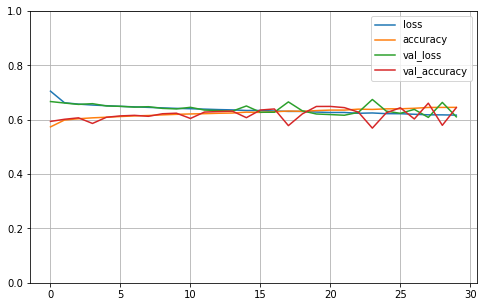

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
model.save("Group_15_CNN.h5", include_optimizer=True)